# Import Packages

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Import Dataset

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [15]:
for col in df.columns[1:]:
    print(df[col].value_counts())

0    42000
Name: pixel0, dtype: int64
0    42000
Name: pixel1, dtype: int64
0    42000
Name: pixel2, dtype: int64
0    42000
Name: pixel3, dtype: int64
0    42000
Name: pixel4, dtype: int64
0    42000
Name: pixel5, dtype: int64
0    42000
Name: pixel6, dtype: int64
0    42000
Name: pixel7, dtype: int64
0    42000
Name: pixel8, dtype: int64
0    42000
Name: pixel9, dtype: int64
0    42000
Name: pixel10, dtype: int64
0    42000
Name: pixel11, dtype: int64
0      41998
116        1
10         1
Name: pixel12, dtype: int64
0      41998
254        1
216        1
Name: pixel13, dtype: int64
0      41999
216        1
Name: pixel14, dtype: int64
0    41999
9        1
Name: pixel15, dtype: int64
0    42000
Name: pixel16, dtype: int64
0    42000
Name: pixel17, dtype: int64
0    42000
Name: pixel18, dtype: int64
0    42000
Name: pixel19, dtype: int64
0    42000
Name: pixel20, dtype: int64
0    42000
Name: pixel21, dtype: int64
0    42000
Name: pixel22, dtype: int64
0    42000
Name: pixel23, dtype

0      40101
253      146
254      122
255      116
252       37
       ...  
100        1
68         1
222        1
140        1
161        1
Name: pixel103, Length: 254, dtype: int64
0      40767
254       84
253       69
255       62
128       19
       ...  
184        1
78         1
143        1
54         1
69         1
Name: pixel104, Length: 247, dtype: int64
0      41298
255       50
253       44
254       34
12         9
       ...  
145        1
209        1
114        1
83         1
175        1
Name: pixel105, Length: 218, dtype: int64
0      41624
255       19
254       15
253        9
191        8
       ...  
237        1
14         1
46         1
78         1
239        1
Name: pixel106, Length: 183, dtype: int64
0      41845
254       13
253        6
43         5
13         5
       ...  
238        1
143        1
16         1
48         1
45         1
Name: pixel107, Length: 97, dtype: int64
0      41940
255        5
8          3
25         3
1          2
188        

0      41859
11         5
28         4
22         4
128        4
       ...  
82         1
114        1
146        1
178        1
191        1
Name: pixel194, Length: 105, dtype: int64
0      41989
253        1
61         1
54         1
85         1
19         1
144        1
79         1
78         1
172        1
73         1
33         1
Name: pixel195, dtype: int64
0    42000
Name: pixel196, dtype: int64
0      41986
58         2
25         2
86         1
117        1
44         1
8          1
5          1
97         1
1          1
128        1
64         1
32         1
Name: pixel197, dtype: int64
0      41948
51         3
28         2
248        2
123        2
18         2
220        1
77         1
43         1
170        1
10         1
9          1
8          1
71         1
7          1
198        1
166        1
6          1
133        1
36         1
3          1
34         1
2          1
225        1
33         1
12         1
110        1
29         1
15         1
219        1
12

0      31910
253     1380
252      735
254      506
255      266
       ...  
137        9
130        9
201        8
97         7
87         6
Name: pixel287, Length: 256, dtype: int64
0      26664
253     2416
252     1122
254     1050
255      443
       ...  
103       18
96        18
77        18
88        16
110       15
Name: pixel288, Length: 256, dtype: int64
0      21640
253     3558
254     1777
252     1524
255      741
       ...  
69        20
104       19
103       18
77        17
146       16
Name: pixel289, Length: 256, dtype: int64
0      18460
253     4327
254     2241
252     1742
255      987
       ...  
104       24
122       24
109       23
77        20
98        20
Name: pixel290, Length: 256, dtype: int64
0      17954
253     4328
254     2150
252     1918
255      799
       ...  
110       23
166       23
150       22
98        22
90        17
Name: pixel291, Length: 256, dtype: int64
0      19231
253     3740
254     1948
252     1565
255      644
       ...

0      20514
253     3386
254     2123
252     1508
255      635
       ...  
65        23
136       22
81        22
124       16
130       11
Name: pixel376, Length: 256, dtype: int64
0      18938
253     3863
254     2326
252     1656
255      769
       ...  
71        25
75        25
46        24
65        20
96        18
Name: pixel377, Length: 256, dtype: int64
0      17424
253     5338
254     3376
252     1905
255      998
       ...  
104       22
33        21
65        21
164       19
117       18
Name: pixel378, Length: 256, dtype: int64
0      14192
253     5491
254     3395
252     1996
255     1248
       ...  
118       29
65        27
90        27
153       22
33        17
Name: pixel379, Length: 256, dtype: int64
0      12473
253     5259
254     3358
252     2415
255     1106
       ...  
74        33
105       31
117       28
98        28
33        26
Name: pixel380, Length: 256, dtype: int64
0      13877
253     5472
254     3371
252     2555
255      963
       ...

0      14748
253     5265
254     3418
252     2134
255     1067
       ...  
33        27
97        25
105       25
90        24
80        21
Name: pixel464, Length: 256, dtype: int64
0      16342
253     4687
254     2707
252     2075
255      887
       ...  
161       30
105       28
93        27
33        26
103       23
Name: pixel465, Length: 256, dtype: int64
0      18937
253     3883
254     1982
252     1740
255      693
       ...  
33        26
105       25
127       24
93        24
90        22
Name: pixel466, Length: 256, dtype: int64
0      22950
253     3428
254     1533
252     1275
255      591
       ...  
202       21
87        20
77        20
101       20
93        19
Name: pixel467, Length: 256, dtype: int64
0      27226
253     2673
254     1132
252      889
255      484
       ...  
175       17
164       16
77        15
129       15
101       13
Name: pixel468, Length: 256, dtype: int64
0      31275
253     1746
252      715
254      669
255      353
       ...

0      29103
253     2108
252      834
254      752
255      574
       ...  
96        12
119       11
95        11
134        9
172        9
Name: pixel552, Length: 256, dtype: int64
0      33350
253     1307
252      506
254      459
255      290
       ...  
175        8
134        6
105        6
124        6
88         5
Name: pixel553, Length: 256, dtype: int64
0      36655
253      623
252      280
254      244
255      141
       ...  
188        5
100        5
89         4
87         4
73         3
Name: pixel554, Length: 256, dtype: int64
0      39166
253      255
252      119
254       96
255       57
       ...  
164        2
79         2
101        2
99         2
124        2
Name: pixel555, Length: 256, dtype: int64
0      40780
253       82
254       40
252       31
255       18
       ...  
242        1
200        1
226        1
197        1
249        1
Name: pixel556, Length: 242, dtype: int64
0      41629
253       16
254        8
252        6
128        6
       ...

0      39086
253      259
252      129
254       73
255       67
       ...  
236        1
79         1
194        1
229        1
206        1
Name: pixel637, Length: 255, dtype: int64
0      40428
253      111
252       73
254       43
19        28
       ...  
216        1
88         1
118        1
85         1
122        1
Name: pixel638, Length: 240, dtype: int64
0      41224
253       46
252       34
255       15
3         14
       ...  
87         1
246        1
172        1
204        1
127        1
Name: pixel639, Length: 215, dtype: int64
0      41674
253       15
252       12
11         7
21         7
       ...  
246        1
235        1
86         1
22         1
121        1
Name: pixel640, Length: 153, dtype: int64
0      41895
1          4
6          4
49         3
78         3
       ...  
113        1
112        1
46         1
173        1
47         1
Name: pixel641, Length: 71, dtype: int64
0      41985
27         1
22         1
149        1
19         1
142        

0    42000
Name: pixel729, dtype: int64
0    42000
Name: pixel730, dtype: int64
0    42000
Name: pixel731, dtype: int64
0      41984
255        2
13         2
158        1
59         1
24         1
22         1
83         1
82         1
208        1
16         1
140        1
7          1
69         1
68         1
Name: pixel732, dtype: int64
0      41937
253        3
16         2
6          2
9          2
22         2
29         2
254        2
42         1
198        1
43         1
136        1
40         1
199        1
39         1
7          1
10         1
166        1
236        1
38         1
197        1
69         1
36         1
35         1
3          1
2          1
65         1
1          1
96         1
172        1
255        1
45         1
118        1
62         1
30         1
28         1
251        1
154        1
122        1
58         1
89         1
55         1
23         1
86         1
77         1
181        1
117        1
180        1
50         1
18         1
177   

# Train-Test Split

In [19]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [22]:
train = pd.concat([X_train, y_train], axis=1)
target = 'label'
predictors = [x for x in train.columns if x not in [target]]

# Neural Network

In [24]:
print(X_train.shape)
X_test.shape

(33600, 784)


(8400, 784)

In [25]:
X_train /= 255.
X_test /= 255.

In [26]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## First Model

In [27]:
model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(784,)))
model_1.add(Dense(10, activation='softmax'))

In [28]:
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [30]:
results_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 2s 54us/step - loss: 1.0469 - acc: 0.7452 - val_loss: 0.6472 - val_acc: 0.8452
Epoch 2/50
33600/33600 [==============================] - 2s 48us/step - loss: 0.5522 - acc: 0.8650 - val_loss: 0.4945 - val_acc: 0.8713
Epoch 3/50
33600/33600 [==============================] - 2s 51us/step - loss: 0.4525 - acc: 0.8837 - val_loss: 0.4305 - val_acc: 0.8835
Epoch 4/50
33600/33600 [==============================] - 2s 51us/step - loss: 0.4035 - acc: 0.8921 - val_loss: 0.3942 - val_acc: 0.8912
Epoch 5/50
33600/33600 [==============================] - 2s 49us/step - loss: 0.3731 - acc: 0.8985 - val_loss: 0.3699 - val_acc: 0.8960
Epoch 6/50
33600/33600 [==============================] - 2s 47us/step - loss: 0.3514 - acc: 0.9028 - val_loss: 0.3528 - val_acc: 0.9006
Epoch 7/50
33600/33600 [==============================] - 2s 47us/step - loss: 0.3348 - acc: 0.9063 - val_loss: 0.3387 - val_acc:

In [31]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

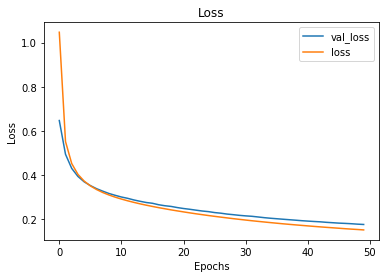

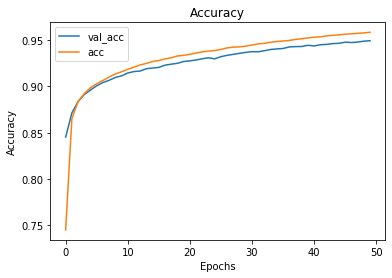

In [32]:
visualize_training_results(results_1)

## Second Model

In [34]:
model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(784,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(10, activation='softmax'))

In [35]:
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [36]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [38]:
results_2 = model_2.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.2183 - acc: 0.9382 - val_loss: 0.2355 - val_acc: 0.9317
Epoch 2/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.2123 - acc: 0.9405 - val_loss: 0.2311 - val_acc: 0.9319
Epoch 3/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.2067 - acc: 0.9419 - val_loss: 0.2251 - val_acc: 0.9327
Epoch 4/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.2014 - acc: 0.9433 - val_loss: 0.2206 - val_acc: 0.9346
Epoch 5/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.1964 - acc: 0.9449 - val_loss: 0.2163 - val_acc: 0.9354
Epoch 6/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.1916 - acc: 0.9463 - val_loss: 0.2126 - val_acc: 0.9380
Epoch 7/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.1872 - acc: 0.9479 - val_loss: 0.2078 - v

33600/33600 [==============================] - 2s 48us/step - loss: 0.0731 - acc: 0.9820 - val_loss: 0.1251 - val_acc: 0.9636
Epoch 60/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0720 - acc: 0.9822 - val_loss: 0.1249 - val_acc: 0.9637
Epoch 61/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0709 - acc: 0.9825 - val_loss: 0.1246 - val_acc: 0.9627
Epoch 62/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0700 - acc: 0.9828 - val_loss: 0.1235 - val_acc: 0.9633
Epoch 63/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0688 - acc: 0.9833 - val_loss: 0.1226 - val_acc: 0.9640
Epoch 64/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0678 - acc: 0.9835 - val_loss: 0.1225 - val_acc: 0.9630
Epoch 65/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0669 - acc: 0.9832 - val_loss: 0.1230 - val_acc: 0.9640
Epoch 66/200
33600/33600 [==============

Epoch 118/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0334 - acc: 0.9939 - val_loss: 0.1101 - val_acc: 0.9661
Epoch 119/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0331 - acc: 0.9940 - val_loss: 0.1100 - val_acc: 0.9662
Epoch 120/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0327 - acc: 0.9943 - val_loss: 0.1104 - val_acc: 0.9655
Epoch 121/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0323 - acc: 0.9944 - val_loss: 0.1101 - val_acc: 0.9656
Epoch 122/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0319 - acc: 0.9944 - val_loss: 0.1099 - val_acc: 0.9664
Epoch 123/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0315 - acc: 0.9946 - val_loss: 0.1101 - val_acc: 0.9668
Epoch 124/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0311 - acc: 0.9946 - val_loss: 0.1098 - val_acc: 0.9667
Epoch 125/200
33600/

33600/33600 [==============================] - 2s 48us/step - loss: 0.0174 - acc: 0.9985 - val_loss: 0.1094 - val_acc: 0.9681
Epoch 177/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.0172 - acc: 0.9984 - val_loss: 0.1099 - val_acc: 0.9680
Epoch 178/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.0171 - acc: 0.9986 - val_loss: 0.1100 - val_acc: 0.9677
Epoch 179/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0169 - acc: 0.9986 - val_loss: 0.1100 - val_acc: 0.9676
Epoch 180/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0167 - acc: 0.9987 - val_loss: 0.1098 - val_acc: 0.9674
Epoch 181/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0166 - acc: 0.9986 - val_loss: 0.1097 - val_acc: 0.9681
Epoch 182/200
33600/33600 [==============================] - 2s 48us/step - loss: 0.0164 - acc: 0.9987 - val_loss: 0.1095 - val_acc: 0.9679
Epoch 183/200
33600/33600 [=======

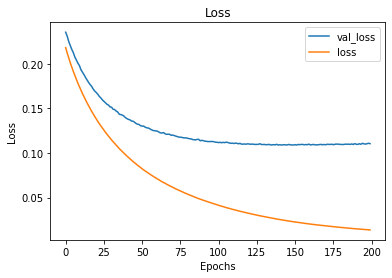

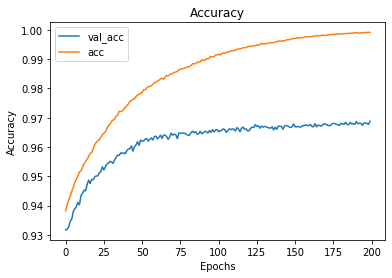

In [39]:
visualize_training_results(results_2)

## Third Model

In [40]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(784,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

In [41]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [44]:
results_3 = model_3.fit(X_train, y_train, epochs=400, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/400
33600/33600 [==============================] - 2s 54us/step - loss: 0.4174 - acc: 0.8831 - val_loss: 0.3979 - val_acc: 0.8869
Epoch 2/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.3686 - acc: 0.8948 - val_loss: 0.3607 - val_acc: 0.8951
Epoch 3/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.3401 - acc: 0.9023 - val_loss: 0.3395 - val_acc: 0.9012
Epoch 4/400
33600/33600 [==============================] - 2s 51us/step - loss: 0.3194 - acc: 0.9074 - val_loss: 0.3228 - val_acc: 0.9065
Epoch 5/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.3029 - acc: 0.9119 - val_loss: 0.3116 - val_acc: 0.9079
Epoch 6/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.2888 - acc: 0.9166 - val_loss: 0.2964 - val_acc: 0.9146
Epoch 7/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.2762 - acc: 0.9205 - val_loss: 0.2849 - v

33600/33600 [==============================] - 2s 61us/step - loss: 0.0663 - acc: 0.9824 - val_loss: 0.1191 - val_acc: 0.9643
Epoch 60/400
33600/33600 [==============================] - 2s 56us/step - loss: 0.0649 - acc: 0.9824 - val_loss: 0.1188 - val_acc: 0.9630
Epoch 61/400
33600/33600 [==============================] - 2s 53us/step - loss: 0.0635 - acc: 0.9826 - val_loss: 0.1184 - val_acc: 0.9637
Epoch 62/400
33600/33600 [==============================] - 2s 48us/step - loss: 0.0624 - acc: 0.9836 - val_loss: 0.1187 - val_acc: 0.9645
Epoch 63/400
33600/33600 [==============================] - 2s 48us/step - loss: 0.0611 - acc: 0.9837 - val_loss: 0.1165 - val_acc: 0.9640
Epoch 64/400
33600/33600 [==============================] - 2s 48us/step - loss: 0.0595 - acc: 0.9846 - val_loss: 0.1160 - val_acc: 0.9655
Epoch 65/400
33600/33600 [==============================] - 2s 53us/step - loss: 0.0586 - acc: 0.9848 - val_loss: 0.1160 - val_acc: 0.9636
Epoch 66/400
33600/33600 [==============

Epoch 118/400
33600/33600 [==============================] - 2s 54us/step - loss: 0.0214 - acc: 0.9967 - val_loss: 0.1156 - val_acc: 0.9665
Epoch 119/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0210 - acc: 0.9967 - val_loss: 0.1164 - val_acc: 0.9660
Epoch 120/400
33600/33600 [==============================] - 2s 55us/step - loss: 0.0206 - acc: 0.9966 - val_loss: 0.1157 - val_acc: 0.9665
Epoch 121/400
33600/33600 [==============================] - 2s 66us/step - loss: 0.0201 - acc: 0.9972 - val_loss: 0.1162 - val_acc: 0.9667
Epoch 122/400
33600/33600 [==============================] - 2s 54us/step - loss: 0.0197 - acc: 0.9971 - val_loss: 0.1164 - val_acc: 0.9664
Epoch 123/400
33600/33600 [==============================] - 2s 53us/step - loss: 0.0195 - acc: 0.9973 - val_loss: 0.1156 - val_acc: 0.9671
Epoch 124/400
33600/33600 [==============================] - 2s 51us/step - loss: 0.0191 - acc: 0.9974 - val_loss: 0.1172 - val_acc: 0.9669
Epoch 125/400
33600/

33600/33600 [==============================] - 2s 50us/step - loss: 0.0081 - acc: 0.9997 - val_loss: 0.1277 - val_acc: 0.9661
Epoch 177/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0080 - acc: 0.9996 - val_loss: 0.1274 - val_acc: 0.9669
Epoch 178/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0079 - acc: 0.9996 - val_loss: 0.1278 - val_acc: 0.9669
Epoch 179/400
33600/33600 [==============================] - 2s 52us/step - loss: 0.0077 - acc: 0.9997 - val_loss: 0.1280 - val_acc: 0.9670
Epoch 180/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0076 - acc: 0.9996 - val_loss: 0.1280 - val_acc: 0.9665
Epoch 181/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0075 - acc: 0.9997 - val_loss: 0.1287 - val_acc: 0.9665
Epoch 182/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0074 - acc: 0.9997 - val_loss: 0.1285 - val_acc: 0.9662
Epoch 183/400
33600/33600 [=======

33600/33600 [==============================] - 2s 47us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1381 - val_acc: 0.9663
Epoch 235/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 0.9667
Epoch 236/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1382 - val_acc: 0.9662
Epoch 237/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1383 - val_acc: 0.9667
Epoch 238/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1382 - val_acc: 0.9665
Epoch 239/400
33600/33600 [==============================] - 2s 52us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1390 - val_acc: 0.9663
Epoch 240/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1385 - val_acc: 0.9661
Epoch 241/400
33600/33600 [=======

33600/33600 [==============================] - 2s 51us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1469 - val_acc: 0.9662
Epoch 293/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1459 - val_acc: 0.9668
Epoch 294/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1463 - val_acc: 0.9664
Epoch 295/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1470 - val_acc: 0.9663
Epoch 296/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1469 - val_acc: 0.9667
Epoch 297/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1477 - val_acc: 0.9668
Epoch 298/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1467 - val_acc: 0.9662
Epoch 299/400
33600/33600 [=======

33600/33600 [==============================] - 2s 50us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1535 - val_acc: 0.9665
Epoch 351/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 0.9665
Epoch 352/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1524 - val_acc: 0.9667
Epoch 353/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1522 - val_acc: 0.9668
Epoch 354/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1529 - val_acc: 0.9664
Epoch 355/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 0.9663
Epoch 356/400
33600/33600 [==============================] - 2s 52us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1530 - val_acc: 0.9667
Epoch 357/400
33600/33600 [=======

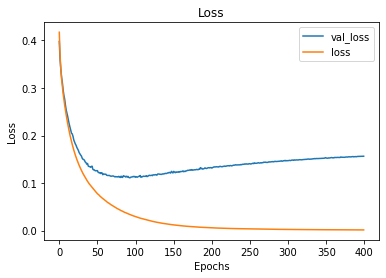

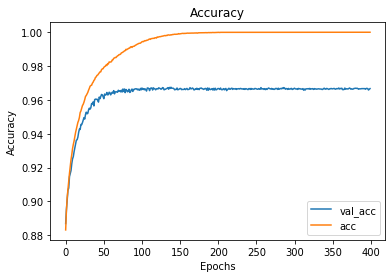

In [45]:
visualize_training_results(results_3)